# risk analysis of space shuttle

In [36]:
import os
os.chdir("C:/Users/subhash chandra bose/Desktop/datasets")  #change the directory to the req location
os.getcwd()

'C:\\Users\\subhash chandra bose\\Desktop\\datasets'

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
d=pd.read_csv("challenger.csv")
d

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [38]:
f=d['O.ring.failures']
f    #target


0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [39]:
t=d['temperature']
t

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

Text(0.5,0,'t')

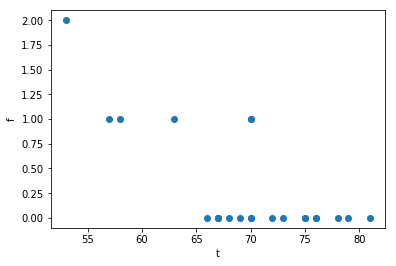

In [40]:
plt.plot(t,f,'o')     # 'o' is the plot style...to see bubble like points
plt.ylabel('f')
plt.xlabel('t')

In [41]:
# represents the nonlinear realation ship of the variables
#most of the failures are at higher temperatures(>66)

In [42]:
p=d['pressure']
p

0      50
1      50
2      50
3      50
4      50
5      50
6     100
7     100
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: pressure, dtype: int64

Text(0.5,0,'p')

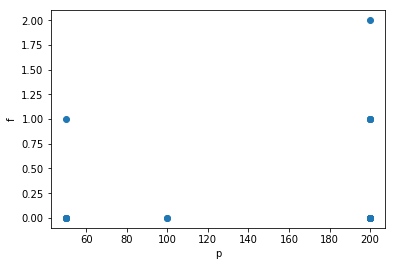

In [43]:
plt.plot(p,f,'o')     # 'o' is the plot style...to see bubble like points
plt.ylabel('f')
plt.xlabel('p')

Text(0.5,0,'p')

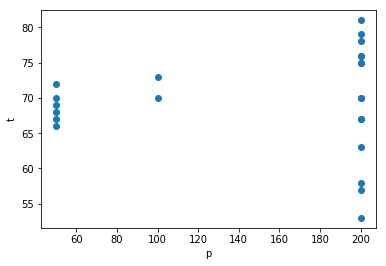

In [44]:
plt.plot(p,t,'o')     # 'o' is the plot style...to see bubble like points
plt.ylabel('t')
plt.xlabel('p')

In [45]:
# at high pressures and low temperatures,failures can be avoided
#at low pressures all the temperatures we have come accross are high and are failures.
# it is advisable to launch it at high p,low temp...also look for the observations with low pressures and low temperatures
#also look for few more observations at medium temperatures(preferrably 100)

In [46]:
d.describe()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.304348,69.565217,152.173913,12.00000
std,0.0,0.558796,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,0.500000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


In [47]:
d.cov()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,0.0,0.000000,0.000000,0.000000,0.000000
O.ring.failures,0.0,0.312253,-2.861660,8.399209,-0.045455
temperature,0.0,-2.861660,49.802372,19.169960,11.045455
pressure,0.0,8.399209,19.169960,4654.150198,388.636364
launch_id,0.0,-0.045455,11.045455,388.636364,46.000000


In [48]:
d.corr()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [49]:
mean_of_failures=d['O.ring.failures'].mean()
mean_of_failures

0.30434782608695654

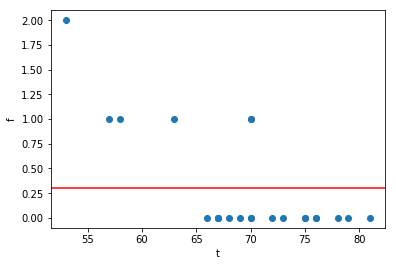

In [50]:
plt.plot(t,f,'o')     # 'o' is the plot style...to see bubble like points
plt.ylabel('f')
plt.xlabel('t')
plt.axhline(mean_of_failures,color='r',linestyle='-')
plt.show()

# stats model

In [51]:
import statsmodels.api as sm
model=sm.OLS(f,t).fit()   # all stats models takes output first and then takes inputs
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Tue, 04 Jun 2019   Prob (F-statistic):             0.0402
Time:                        21:00:38   Log-Likelihood:                -19.595
No. Observations:                  23   AIC:                             41.19
Df Residuals:                      22   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# for a good model, r square values must be more than 70,below 50 is bad
# adjusted r square is a measure of goodness of fit i.e., here 2 variables are not nicely understood by the model
# f statistic measure sthe impact of multiple inputs on output...+ value is good
# if temperature raises by 1 degree...no of failures increases by 0.0038
# if p>alpha,accept null hypothesis.if p<alpha,reject null hypothesis.    where alpha is 0.5
# aic=akaike information criteria...for a good model,and for goodbconsideration of the parameter, aic should be high
# when aic values are close enough ...look for bic values in the same way as aic
# after p value...the square range values is confidence range.


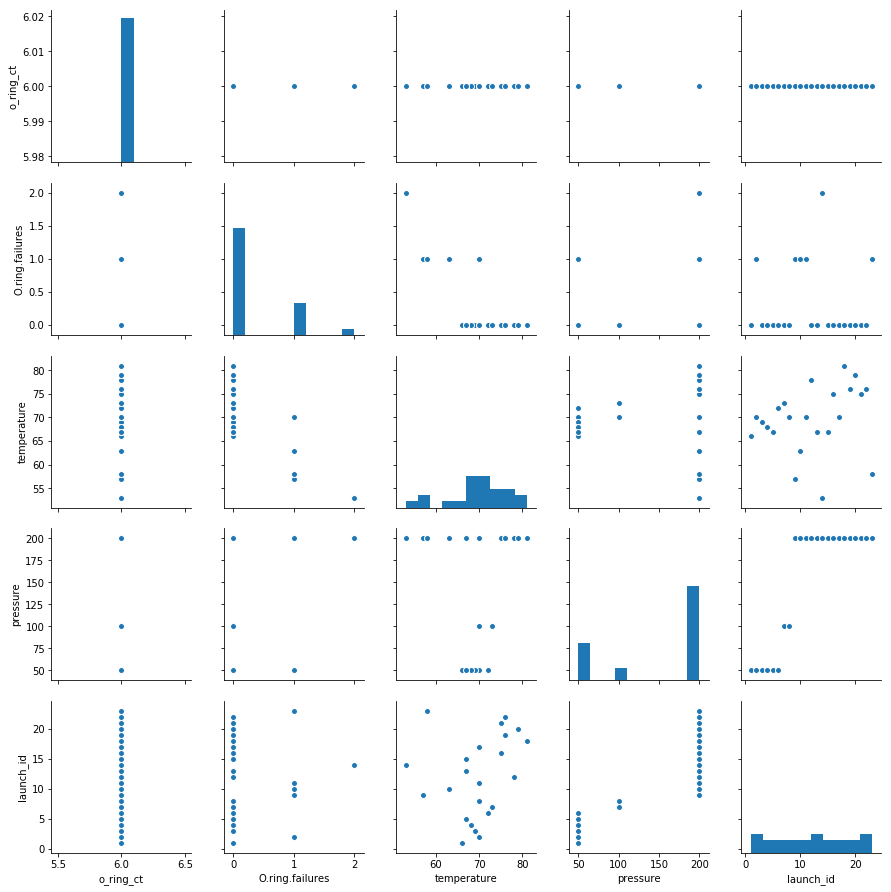

In [53]:
import seaborn as sns
sns.pairplot(d)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


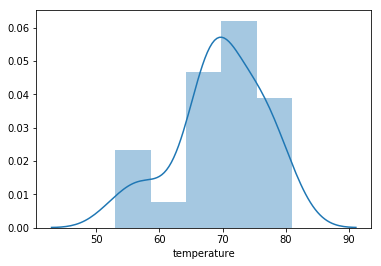

In [54]:
sns.distplot(d['temperature'])                 #density plots-approximately normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


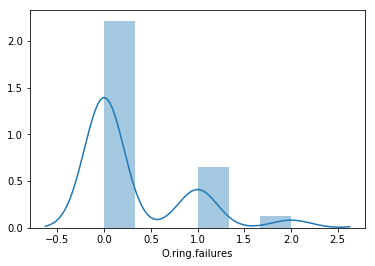

In [55]:
sns.distplot(d['O.ring.failures'])

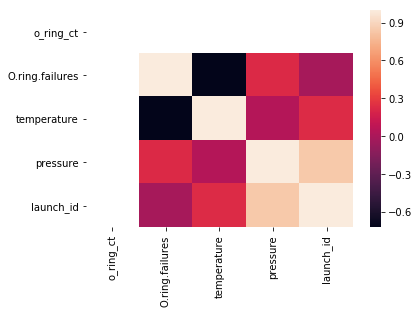

In [56]:
corr=d.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)          # black indicates negative correlation.

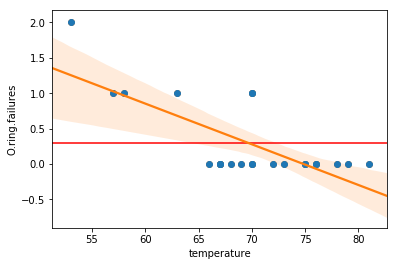

In [57]:
mean_of_failures=d['O.ring.failures'].mean()
plt.plot(t,f,'o')     # 'o' is the plot style...to see bubble like points
plt.ylabel('f')
plt.xlabel('t')
plt.axhline(mean_of_failures,color='r',linestyle='-')
sns.regplot(x='temperature',y='O.ring.failures',data=d)


In [58]:
# split up the data into 'x' array that contains the features to train on and 'y' array with the target variable
X=d['temperature']
y=d['O.ring.failures']
X            # matrix of 23x1

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

In [59]:
y       #23x1

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [60]:
# inorder to multiply both matrices,transpose should be done...transpose is done using reshape...
X=X.values.reshape(-1,1)             #if we get error,use X=X.values,reshape(-1,1)
X

array([[66],
       [70],
       [69],
       [68],
       [67],
       [72],
       [73],
       [70],
       [57],
       [63],
       [70],
       [78],
       [67],
       [53],
       [67],
       [75],
       [70],
       [81],
       [76],
       [79],
       [75],
       [76],
       [58]], dtype=int64)

# random sampling:training and testing

In [98]:
# split the data into training set and test set...RANDOM SAMPLING:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)   
#to have a common sample across all the computers,take random_states=1
#test_size=0.4 means we are giving 40% data to testing,while 60% to training set


In [99]:
X_train

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

In [100]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [101]:
X_train=X_train.reshape((-1,1))
X_train

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

In [102]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)
results  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:',accuracy)     # 50% accuracy because failures have noisy normalized data.

Accuracy of the model: 0.49669252207783493


In [104]:
# print coefficients
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 3.874282260501663
slope: [-0.05197945]


In [105]:
# predictions from the model
X_test=X_test.reshape((-1,1))
predictions=model.predict(X_test)
print('predicted O.ring.failures:',predictions,sep='\n')

predicted O.ring.failures:
[-0.02417649 -0.33605319  0.33967966  1.11937141 -0.23209429  0.23572076
  0.23572076  0.39165911  0.28770021 -0.07615594]


In [106]:
accuracy=model.score(X_test,y_test)
print('Accuracy of the model:',accuracy)     # 50% accuracy because failures have noisy normalized data.

Accuracy of the model: 0.5268468243091089


In [108]:
y_test=y_test.values.reshape((-1,1))
y_test

array([[0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

In [109]:
accuracy=model.score(y_test,predictions)
print('Accuracy of the model:',accuracy) 

Accuracy of the model: -88.95532523230881


In [116]:
# we have completed realizing a model.we shall now check this model on new data points 

# define new data instance
Xnew=[[30]]
#make a prediction
ynew=model.predict(Xnew)
# show the inputs and predicted outputs
print('new tmprature:%s, Predicted failurs=%s'%(Xnew,ynew))       # this type of print statement,in python, is adopted from 'c'

new tmprature:[[30]], Predicted failurs=[2.31489876]


In [111]:
# evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model.predict(X_test)

#model evaluation for training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
# for a good model,rmse should b low.
r2_training=r2_score(y_train,y_train_prediction)
print('model valuation for training set:')
print('-'*20)
print('RMSE is: {}'.format(rmse_training))     # .format argumnts values are passed into those braces
print('r2 square is: {}'.format(r2_training))   #this .format() representation called replacement fields is obtained from c#.net
print("\n")

model valuation for training set:
--------------------
RMSE is: 0.3274346152282803
r2 square is: 0.4966925220778349




In [112]:
import numpy as np
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
# for a good model,rmse should b low.
r2_testing=r2_score(y_test,y_test_prediction)
print('model valuation for testing set:')
print('-'*20)
print('RMSE is: {}'.format(rmse_testing))
print('r2 square is: {}'.format(r2_testing))
print("\n")

#rmse should be low,r sqaure should be high
#rmse gives us the variance..so if variance is high,the data relation is inconsistent
# check whether training is consistent or not using the first statemnt.check the same with testing.now relate both training and testing


model valuation for testing set:
--------------------
RMSE is: 0.440446139764291
r2 square is: 0.5268468243091089




In [113]:
X=X.reshape((-1,1))
y_prediction=model.predict(X)

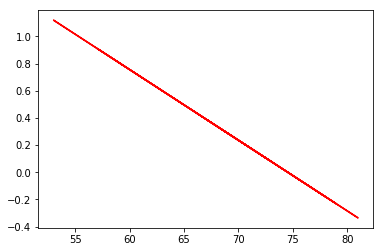

In [115]:
plt.plot(X,y_prediction,color='r')
plt.show()                    # this is th final interpolated line after we train & test the data...remembr,its a prediction

# multiple linear regression 

In [82]:
X=d[['temperature','pressure']]
y=d['O.ring.failures']

In [83]:
model1=sm.OLS(y,X).fit()
predictions=model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.333
Date:                Tue, 04 Jun 2019   Prob (F-statistic):             0.0266
Time:                        15:40:34   Log-Likelihood:                -17.873
No. Observations:                  23   AIC:                             39.75
Df Residuals:                      21   BIC:                             42.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.0030      0.004     -0.745      0.465      -0.011       0.005
pressure        0.0031      0.002      1.842      0.080      -0.000       0.007
==============================================================================
Omnibus:                        8.717   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.616
Skew:                           1.239   Prob(JB):                       0.0366
Kurtosis:                       3.871   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# w.r.to temperature,p>aplha so null hypothesis is considered.but temperture coefficient says that for every 1 degree raise 
#      in temperature,no failure is seen since the value is negative.so as temperatures increses failures doesnot increase is 
#      itself a conclusion.that was a contradiction to our null hypothesis
# w.r.to pressure,null hypothesis is considered.but for 1 unit rise in pressure,0.0031 failures are expected.thus is dependent 
#      on pressure,which is a contradiction to null hypothesis again

# these contradictions are eliminated my comparing the accuracy of multiple linear regression with the simple regression 
#      accurarcy.if multiple is same with a simple parameter accuracy,implies that parameter is not affecting the target.
# in this way we conlcude ruling out all the contradictions

In [119]:
from sklearn.model_selection import train_test_split
X=X.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [120]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
X_train=X_train.reshape((-1,1))
result=model.fit(X_train,y_train)
result

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:',accuracy)

Accuracy of the model: 0.49669252207783493


In [1]:
# while training itself we can see that,for 2 inputs an with temperature as input,the accuracy remained almost same
#        which says that the effect of pressure has almost no significant contribution.
# if it changes,the change in accuracy tells us the effect of that parameter